## CA1 Data Preparation

### Import Libraries for performing data cleaning, analysis and visualizations. 

In [1]:
import pandas as pd   ##data analysis and manipulations tool 
import seaborn as sns  ##Visualization Library 
import numpy as np      ##Numerical python tool
import matplotlib.pyplot as plt   ##Visualization tool 
from sklearn.decomposition import PCA   ##Scikit-Learn, analytical library 

sns.set() #Using Seaborn graphics for all my visualizations

In [2]:
aps_df = pd.read_csv('aps_failure_set_CA1.csv')

### Visualizing head and tail of my dataset

In [3]:
aps_df.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,na,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,neg,39308,na,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,neg,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,neg,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
aps_df.shape

(60000, 171)

In [5]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [6]:
aps_df.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [7]:
aps_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

### As Pandas fail to identify missing values such as 'na', It has been added on pd.read(), 
### Then it will be recognized as a corrupt value

In [9]:
miss_val_formats =['na']
aps_df=pd.read_csv("aps_failure_set_CA1.csv", na_values=miss_val_formats)

In [10]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [11]:
aps_df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [12]:
aps_df.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,NaN,2.130706e+09,156.0,0.0,0.0,0.0,0.0,0.0,...,627610.0,376028.0,931828.0,1035236.0,674626.0,161266.0,3284.0,0.0,0.0,0.0
59991,neg,39308,NaN,4.520000e+02,374.0,0.0,0.0,0.0,0.0,0.0,...,312426.0,161694.0,323438.0,292350.0,250112.0,157636.0,234932.0,9506.0,0.0,0.0
59992,neg,14,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,132.0,44.0,80.0,52.0,54.0,0.0,0.0,0.0,0.0,0.0
59993,neg,0,2.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
aps_df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [15]:
aps_no_class = aps_df.drop(columns = ["class"]) 

In [16]:
aps_no_class.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


### In order to deal with the missing data, It has been used the dropna method
### It drop any rows containing a missing value

In [30]:
new_df = aps_no_class.dropna()

In [31]:
new_df.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [32]:
new_df.shape

(591, 170)

In [23]:
new_df = aps_no_class.dropna(axis=1)  ## To drop columns cointaining missing values 

In [24]:
new_df.shape

(60000, 1)

### Filling missing data 
### Its' been used fillna method, filling the missing values with 0 value

In [38]:
aps_test = aps_no_class.fillna(0)

In [39]:
aps_test.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [40]:
aps_test.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

<Axes: xlabel='ab_000', ylabel='Count'>

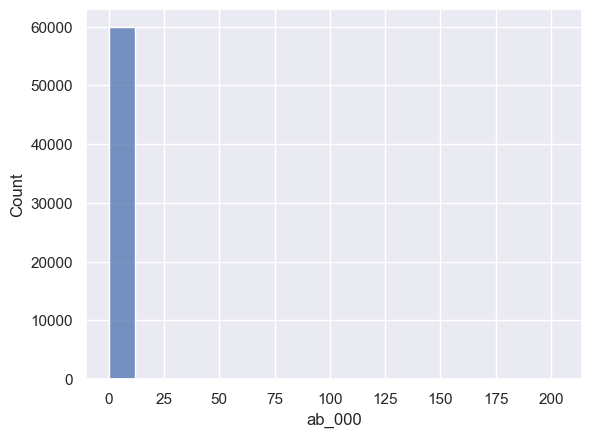

In [66]:
sns.histplot(data=aps_test, x="ab_000")

In [56]:
float_col = aps_test.select_dtypes(include=['float64'])
for col in float_col.columns.values: 
    aps_test[col] = aps_test[col].astype('int64')

In [62]:
aps_test.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,0,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,0,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [58]:
aps_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: int64(170)
memory usage: 77.8 MB


In [64]:
aps_test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Length: 60000, dtype: bool

In [61]:
aps_test.drop_duplicates()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,0,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,0,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0,664,186,0,0,0,0,0,2564,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,2286,0,2130706538,224,0,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,112,0,2130706432,18,0,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,80292,0,2130706432,494,0,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


<Axes: >

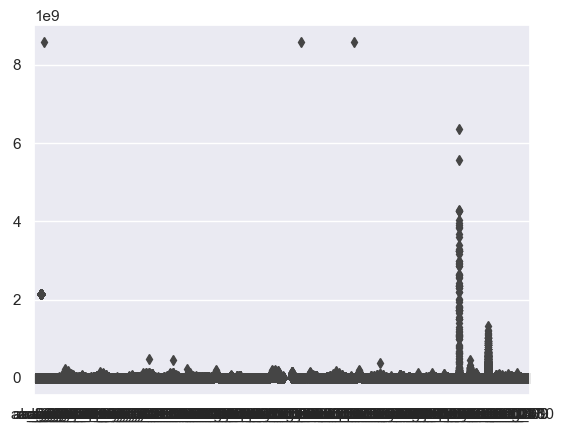

In [65]:
sns.boxplot(data=aps_test)

In [69]:
pca = PCA().fit(aps_test)

Text(0, 0.5, 'cumulated explained variance')

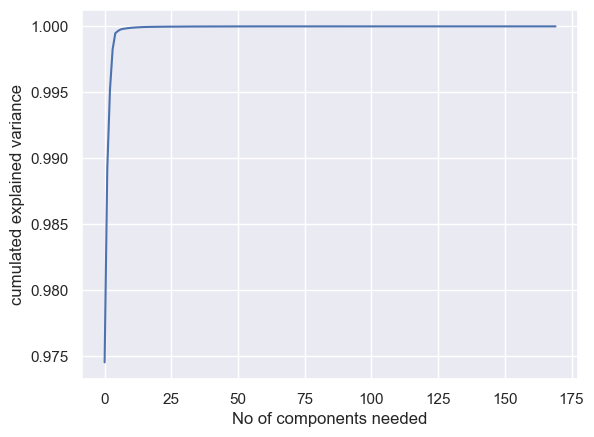

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components needed")
plt.ylabel("cumulated explained variance")


In [91]:
pca = PCA(10)
projected = pca.fit_transform(aps_test)

In [92]:
projected.shape

(60000, 10)

In [93]:
#projected

In [94]:
aps_pca = pd.DataFrame(projected)

In [96]:
aps_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,1.794496e+09,3.211523e+05,-13914.100932,3.221798e+06,1.246086e+07,5.302119e+06,-3.443515e+05,9.257052e+04,-1.213335e+06,2.904779e+06
1,-3.361937e+08,-5.375804e+06,-284084.983415,-6.810371e+06,-1.193847e+05,2.457512e+06,-2.267203e+05,-1.313286e+06,1.005464e+06,-8.059593e+05
2,-3.361927e+08,-5.608250e+06,-277150.003651,-1.020018e+07,-1.375904e+06,-1.456393e+06,8.431764e+05,1.618961e+05,-1.477105e+06,6.712680e+05
3,-3.361710e+08,-6.252036e+06,-263685.285572,-1.471480e+07,-8.833286e+06,-7.683078e+05,2.695536e+05,-2.691089e+05,5.879196e+05,-1.123004e+06
4,-3.362444e+08,-4.891118e+06,-310272.149088,1.014545e+07,-5.099864e+06,-2.738365e+06,1.926148e+06,7.931167e+05,-6.081120e+04,1.631404e+06


In [97]:
aps_pca['class'] = aps_df['class']

In [98]:
aps_pca.head()

,0,1,2,3,4,5,6,7,8,9,class
0,1.794496e+09,3.211523e+05,-13914.100932,3.221798e+06,1.246086e+07,5.302119e+06,-3.443515e+05,9.257052e+04,-1.213335e+06,2.904779e+06,neg
1,-3.361937e+08,-5.375804e+06,-284084.983415,-6.810371e+06,-1.193847e+05,2.457512e+06,-2.267203e+05,-1.313286e+06,1.005464e+06,-8.059593e+05,neg
2,-3.361927e+08,-5.608250e+06,-277150.003651,-1.020018e+07,-1.375904e+06,-1.456393e+06,8.431764e+05,1.618961e+05,-1.477105e+06,6.712680e+05,neg
3,-3.361710e+08,-6.252036e+06,-263685.285572,-1.471480e+07,-8.833286e+06,-7.683078e+05,2.695536e+05,-2.691089e+05,5.879196e+05,-1.123004e+06,neg
4,-3.362444e+08,-4.891118e+06,-310272.149088,1.014545e+07,-5.099864e+06,-2.738365e+06,1.926148e+06,7.931167e+05,-6.081120e+04,1.631404e+06,neg


In [99]:
aps_array = aps_pca.values

In [100]:
from sklearn.model_selection import train_test_split
X = aps_array[:,0:10]
y = aps_array[:,10]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)